<a href="https://colab.research.google.com/github/NathanMacktravis/ML-Projects-for-finance-/blob/main/Loan_approval_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from imblearn.over_sampling import SMOTE

# 1) Collecting data and describing columns

In [2]:
df = pd.read_csv('/content/loan_approval_dataset.csv')

In [3]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [4]:
# Dimension
df.shape

(4269, 13)

The **loan approval dataset** is a collection of financial records and associated information used to determine the eligibility of individuals or organizations for obtaining loans from a lending institution. It includes various factors such as cibil score, income, employment status, loan term, loan amount, assets value, and loan status. This dataset is commonly used in machine learning and data analysis to develop models and algorithms that predict the likelihood of loan approval based on the given features.

* **loan_id** :	ID of the loan
* **no_of_dependents** :Number of Dependents of the Applicant  
* **education** : Education of the Applicant
* **self_employed**	: Employment Status of the Applicant (self employed or not)
* **income_annum** :	Annual Income of the Applicant
* **loan_amount** :	Loan amount
* **loan_term** : 	Loan Term in Years
* **cibil_score** :	credit score
* **residential_assets_value** :	value of the residential assets
* **commercial_assets_value**	: value of the commercial assets
* **luxury_assets_value** :	Value of the luxurial assets
* **bank_asset_value**	: value of the bank assets
* **loan_status** : Loan approval status (approved or rejected)

# 2) Exploratory Data Analysis

## a) Column analysis

In [5]:
# General infos about features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [6]:
# Statitical analysis for numeric values excluding "loand_id" column
df.describe().loc[:, df.describe().columns != 'loan_id']

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [7]:
# Value counts analysis

# Select numerical values only
numerical_features = df.select_dtypes(include=['number']).columns

# Browsing and exlude numerical columns
for col in df.columns:
    if col not in numerical_features:  # Exclut les colonnes numériques
        unique_values = df[col].unique()
        print(f"🔹 {col} ({len(unique_values)} valeurs uniques)")
        print(unique_values)  # Affiche toutes les valeurs uniques
        print("-" * 50)

🔹  education (2 valeurs uniques)
[' Graduate' ' Not Graduate']
--------------------------------------------------
🔹  self_employed (2 valeurs uniques)
[' No' ' Yes']
--------------------------------------------------
🔹  loan_status (2 valeurs uniques)
[' Approved' ' Rejected']
--------------------------------------------------


## b) Distribution analysis

### i) Categorical analysis

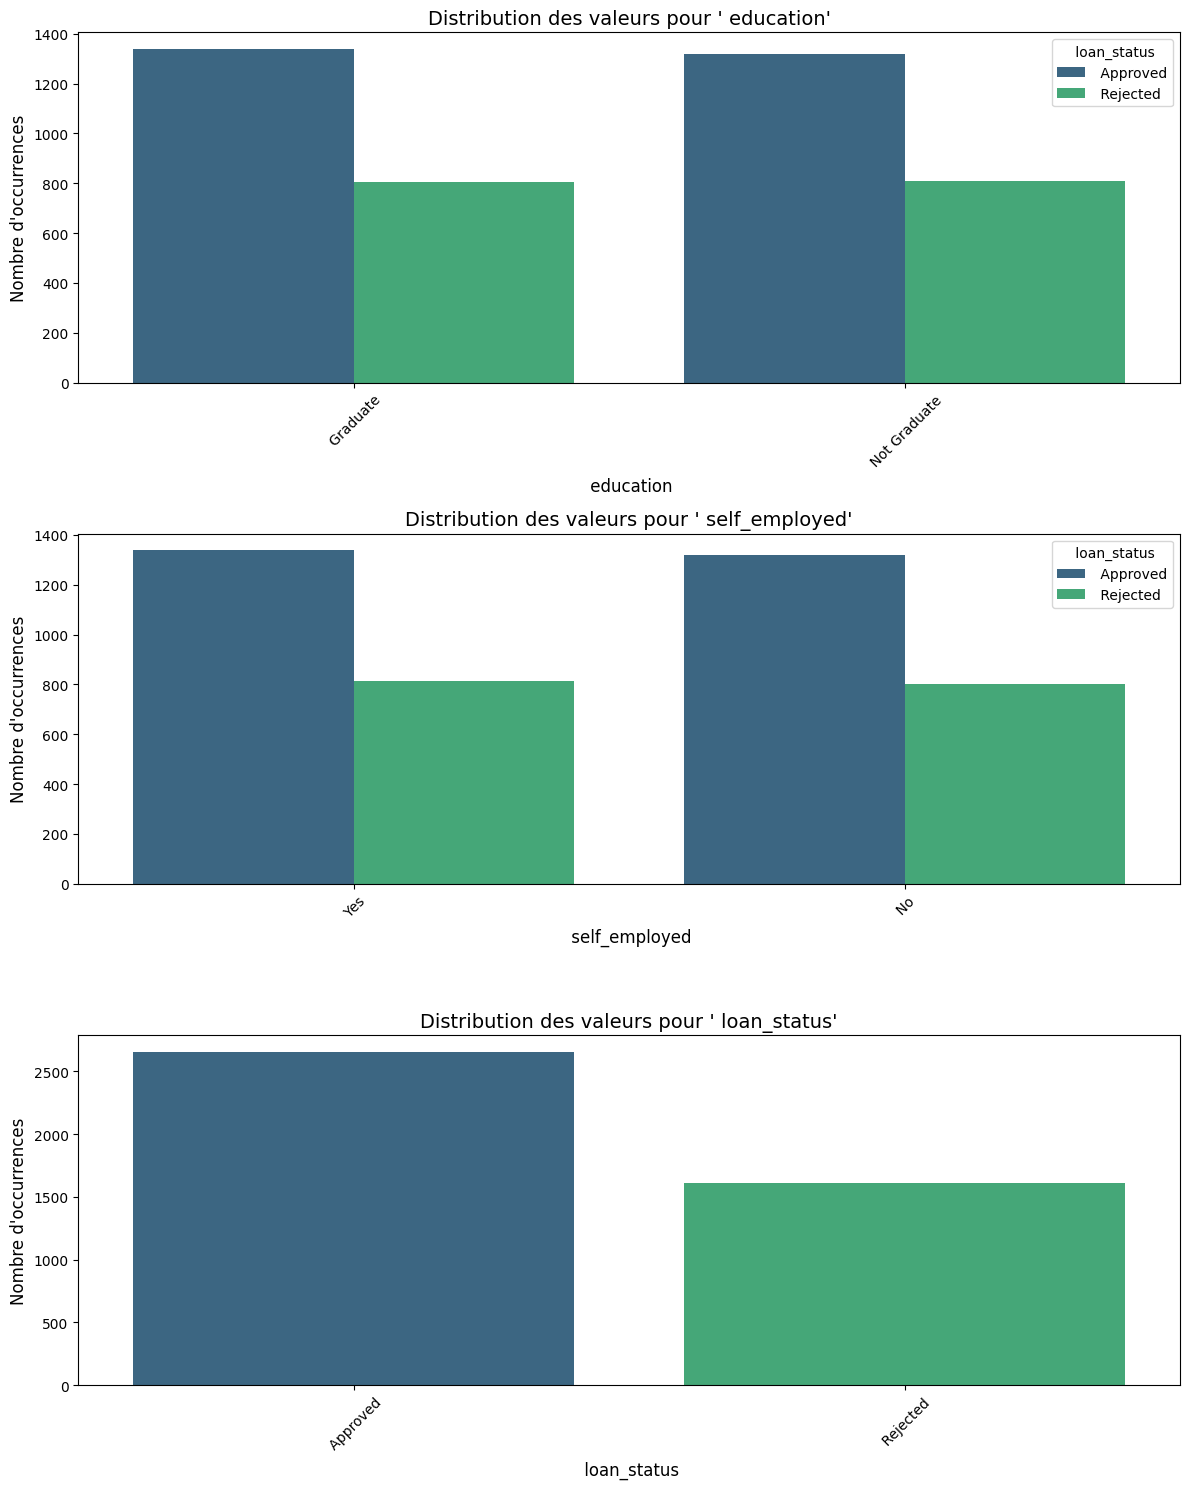

In [8]:
## distribution values for each categorical column


categorical_features = df.select_dtypes(include=['object', 'category']).columns

# Définir la taille de la figure en fonction du nombre de colonnes catégoriques
num_cols = len(categorical_features)
fig, axes = plt.subplots(nrows=num_cols, figsize=(12, 5 * num_cols))

# Si une seule colonne catégorielle, on ajuste pour éviter une erreur d'affichage
if num_cols == 1:
    axes = [axes]

# Création des graphiques avec Seaborn
for ax, col in zip(axes, categorical_features):
    sns.countplot(data=df, x=col, hue=" loan_status", order=df[col].value_counts().index, palette="viridis", ax=ax)
    ax.set_title(f"Distribution des valeurs pour '{col}'", fontsize=14)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel("Nombre d'occurrences", fontsize=12)
    ax.tick_params(axis='x', rotation=45)  # Rotation des labels pour une meilleure lisibilité

# Ajuster l'espace entre les sous-graphiques
plt.tight_layout()
plt.show()

### ii) Numerical analysis

In [9]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

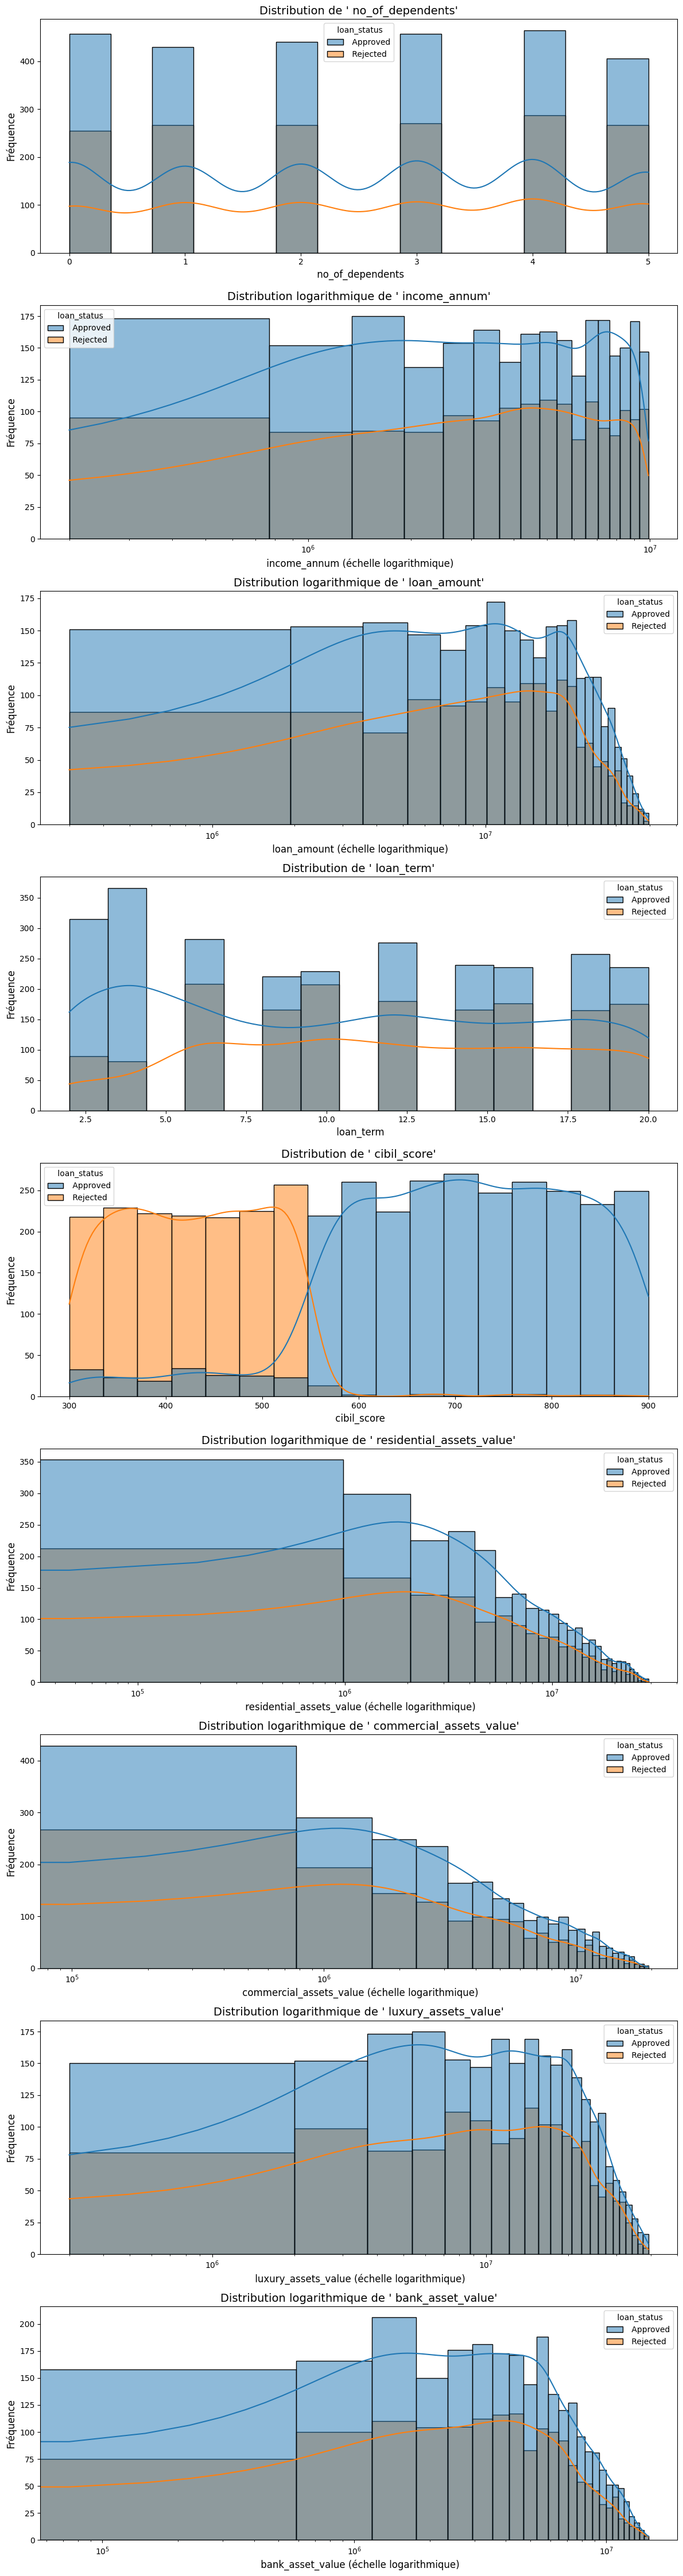

In [10]:
## Distribution values for each numerical column
numerical_features = df.loc[:, df.columns != 'loan_id'].select_dtypes(include=['number']).columns

# Définir la taille de la figure selon le nombre de colonnes numériques
num_cols = len(numerical_features)
fig, axes = plt.subplots(nrows=num_cols, figsize=(12, 5 * num_cols))

# Ajustement si une seule variable numérique
if num_cols == 1:
    axes = [axes]

# Création des histogrammes avec échelle log et palette 'viridis'
for i, (ax, col) in enumerate(zip(axes, numerical_features)):
    # Sélection d'une couleur unique à partir de la palette viridis
    color = sns.color_palette("viridis", num_cols)[i]

    sns.histplot(data=df, x=col, kde="True", hue=" loan_status", color=color, ax=ax)

    # Appliquer une échelle logarithmique seulement pour les grandes valeurs
    if df[col].max() > 1000:
        ax.set_xscale('log')
        ax.set_xlabel(f"{col} (échelle logarithmique)", fontsize=12)
        ax.set_title(f"Distribution logarithmique de '{col}'", fontsize=14)
    else:
        ax.set_xlabel(col, fontsize=12)
        ax.set_title(f"Distribution de '{col}'", fontsize=14)

    ax.set_ylabel("Fréquence", fontsize=12)

plt.tight_layout()
plt.show()


The various analyses show that there is an imbalance of customers within the bank in terms of annual salaries and assets. Further analysis shows that loans are granted in a balanced way to customers who have status, qualifications or material assets.
However, loan approval is heavily influenced by the “credit score”: the lower your score, the more loans are refused, and the higher your score, the better(Also, there are some customers who are exceptions and have very low credit scores, but are still granted loans).

## c) Outlier analysis

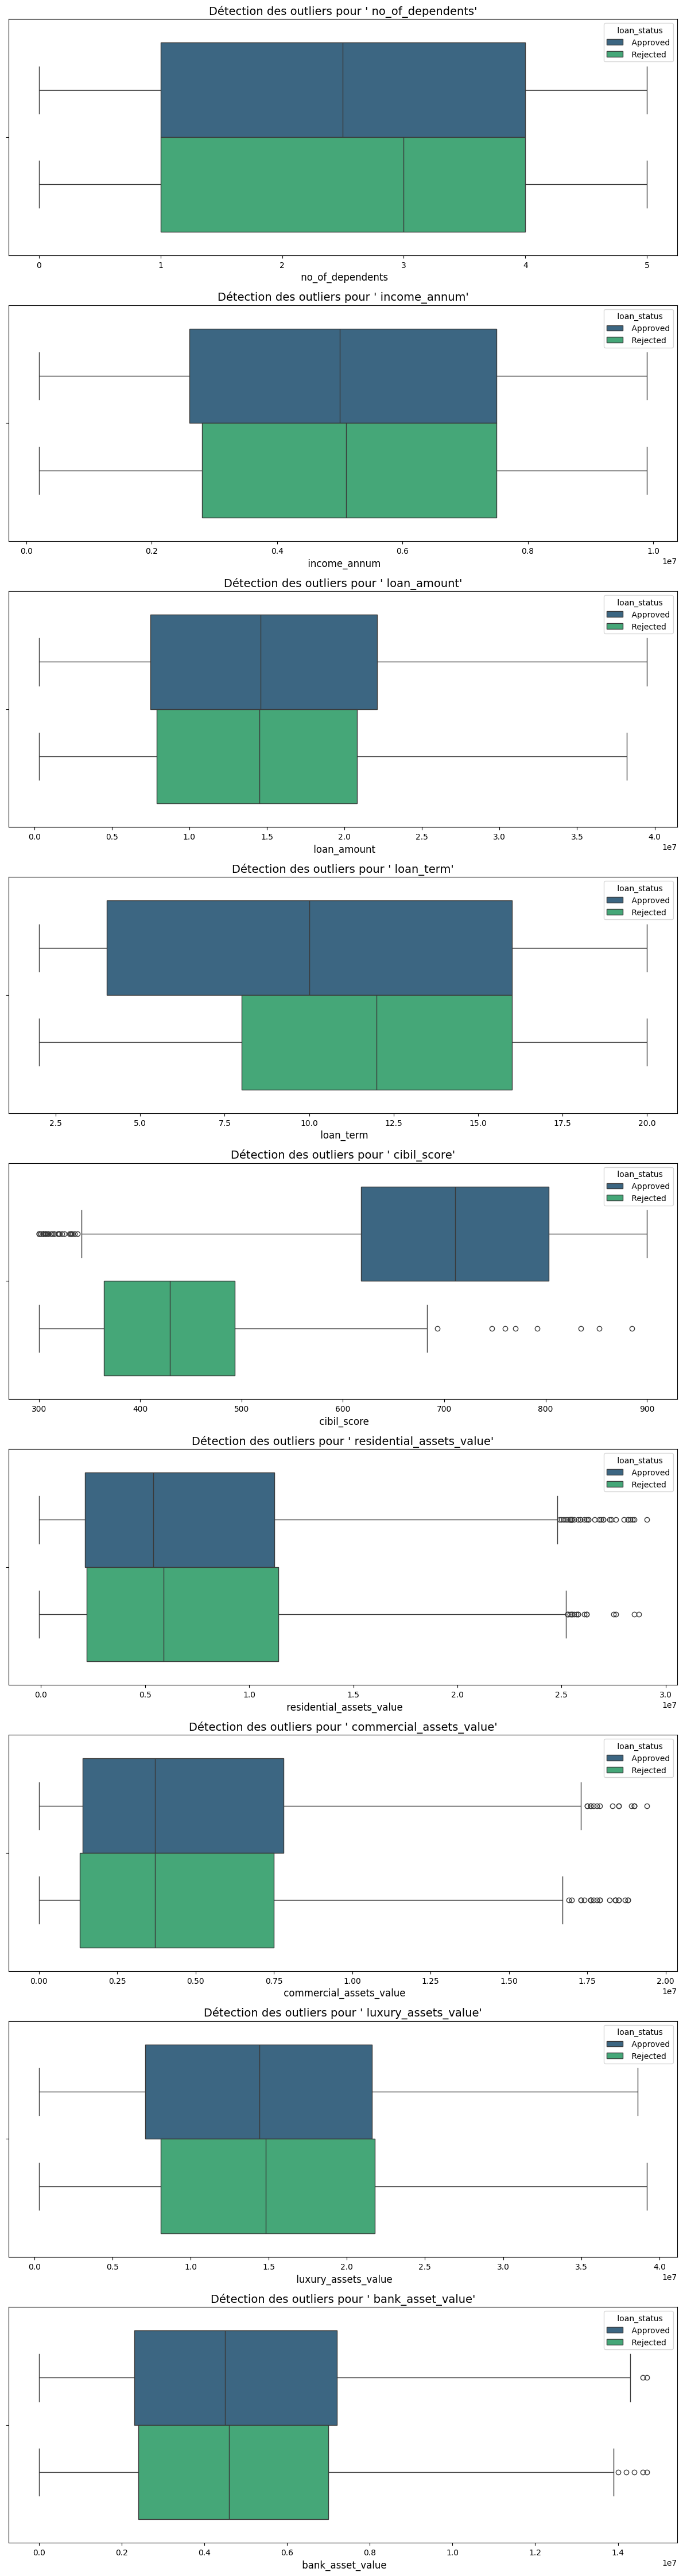

In [11]:
## Visualization of outliers for numerical_features

# Définir la taille de la figure en fonction du nombre de colonnes numériques
num_cols = len(numerical_features)
fig, axes = plt.subplots(nrows=num_cols, figsize=(12, 5 * num_cols))

# Si une seule colonne numérique, on ajuste pour éviter une erreur d'affichage
if num_cols == 1:
    axes = [axes]

# Création des boxplots avec Seaborn
for ax, col in zip(axes, numerical_features):
    sns.boxplot(data=df, x=col, hue=" loan_status", palette="viridis", ax=ax)
    ax.set_title(f"Détection des outliers pour '{col}'", fontsize=14)
    ax.set_xlabel(col, fontsize=12)

# Ajuster l'espace entre les sous-graphiques
plt.tight_layout()
plt.show()

## d) Correlation analysis

## i) Spearman correlation

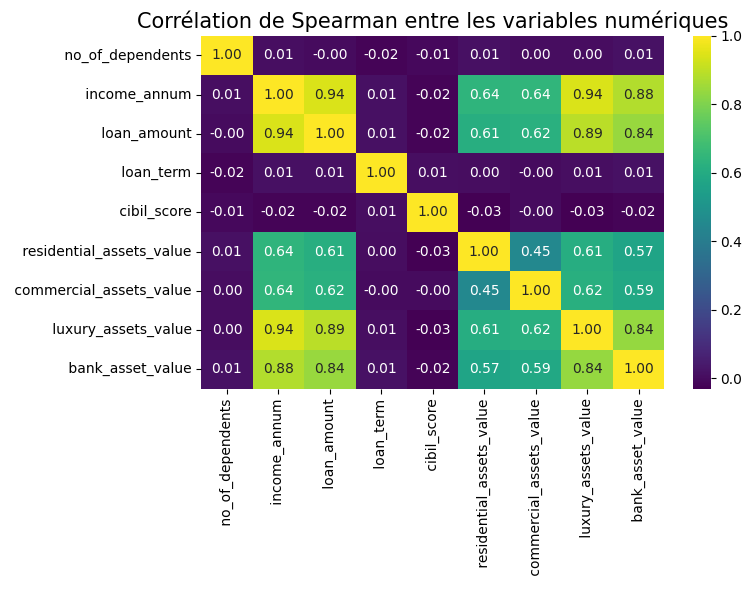

In [12]:
# Calcul de la corrélation de Spearman pour les variables numériques
spearman_corr = df[numerical_features].corr(method='spearman')

# Création de la heatmap
plt.figure(figsize=(8,6))
sns.heatmap(spearman_corr, annot=True, cmap='viridis', fmt=".2f")

plt.title("Corrélation de Spearman entre les variables numériques", fontsize=15)
plt.tight_layout()
plt.show()

## ii) Cramer-V correlation

In [13]:
from scipy.stats import chi2_contingency

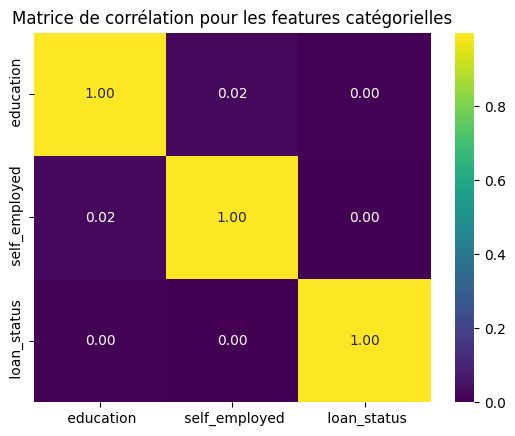

In [14]:
# Fonction pour calculer le coefficient de Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))


# Sélectionner uniquement les colonnes catégorielles
categorical_features = df.select_dtypes(include=['object'])

# Calculer la matrice de corrélation pour les features catégorielles
correlation_matrix = pd.DataFrame(
    index=categorical_features.columns,
    columns=categorical_features.columns
)

for col1 in categorical_features.columns:
    for col2 in categorical_features.columns:
        correlation_matrix.loc[col1, col2] = cramers_v(categorical_features[col1], categorical_features[col2])

# Convertir en float pour éviter les erreurs de type
correlation_matrix = correlation_matrix.astype(float)

# Afficher la heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="viridis", cbar=True)
plt.title("Matrice de corrélation pour les features catégorielles")
plt.show()

# 3) Data Preprocessing

In this project, I will first pre-process the data in order to use linear models, and then adopt an approach for Ensemble Learning models.

## a) Column preprocessing

In [15]:
df_copy_1 = df.copy()

In [16]:
# Delete loan_id column
df_copy_1 = df_copy_1.drop('loan_id', axis=1)

In [17]:
df_copy_1.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


## b) Encoding categorical columns

In [18]:
df_copy_2 = df_copy_1.copy()

In [19]:
df_copy_2.columns

Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [20]:
# Encoding "education", "self_employed" and "loan_status" columns
df_copy_2[' education'] = df_copy_2[' education'].map({' Graduate': 1, ' Not Graduate': 0})
df_copy_2[' self_employed'] = df_copy_2[' self_employed'].map({' Yes': 1, ' No': 0})
df_copy_2[' loan_status'] = df_copy_2[' loan_status'].map({' Approved': 1, ' Rejected': 0})

In [21]:
df_copy_2.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


## c) PreProcessing for linear models

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
df_linear_models = df_copy_2.copy()

In [24]:
# Standadizing " income_annum", " loan_amount", " residential_assets_value", " commercial_assets_value", " luxury_assets_value"  and "bank_asset_value" columns
scaler = StandardScaler()
df_linear_models[' income_annum'] = scaler.fit_transform(df_linear_models[[' income_annum']])
df_linear_models[' loan_amount'] = scaler.fit_transform(df_linear_models[[' loan_amount']])
df_linear_models[' residential_assets_value'] = scaler.fit_transform(df_linear_models[[' residential_assets_value']])
df_linear_models[' commercial_assets_value'] = scaler.fit_transform(df_linear_models[[' commercial_assets_value']])
df_linear_models[' luxury_assets_value'] = scaler.fit_transform(df_linear_models[[' luxury_assets_value']])
df_linear_models[' bank_asset_value'] = scaler.fit_transform(df_linear_models[[' bank_asset_value']])
df_linear_models[' cibil_score'] = scaler.fit_transform(df_linear_models[[' cibil_score']])
df_linear_models[' loan_term'] = scaler.fit_transform(df_linear_models[[' loan_term']])
df_linear_models[' no_of_dependents'] = scaler.fit_transform(df_linear_models[[' no_of_dependents']])

In [25]:
df_linear_models.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,-0.294102,1,0,1.617979,1.633052,0.192617,1.032792,-0.780058,2.877289,0.832028,0.930304,1
1,-1.473548,0,1,-0.341750,-0.324414,-0.508091,-1.061051,-0.733924,-0.631921,-0.694993,-0.515936,0
2,0.295621,1,0,1.439822,1.610933,1.594031,-0.544840,-0.057300,-0.107818,1.996520,2.407316,0
3,0.295621,1,0,1.119139,1.721525,-0.508091,-0.771045,1.649637,-0.381263,0.897943,0.899533,0
4,1.475067,0,1,1.689242,1.002681,1.594031,-1.264055,0.757724,0.735304,1.568075,0.007172,0


## d) SMOTE preprocessing

Here we're using SMOTE method to balance **"Loan status"** classes.

In [26]:
# import smote library
from imblearn.over_sampling import SMOTE

In [27]:
# Using smote method on " loan_status" column for df_copy_2 dataframe
X = df_copy_2.drop(' loan_status', axis=1)
y = df_copy_2[' loan_status']

smote = SMOTE(random_state=42)
X_smote_nlm, y_smote_nlm = smote.fit_resample(X, y)



In [28]:
print(y_smote_nlm.value_counts())

 loan_status
1    2656
0    2656
Name: count, dtype: int64


In [29]:
# Using smote method on " loan_status" column for df_linear_models dataframe
X_linear_models = df_linear_models.drop(' loan_status', axis=1)
y_linear_models = df_linear_models[' loan_status']

smote_linear_models = SMOTE(random_state=42)
X_smote_linear_models, y_smote_linear_models = smote_linear_models.fit_resample(X_linear_models, y_linear_models)



In [30]:
print(y_smote_linear_models.value_counts())

 loan_status
1    2656
0    2656
Name: count, dtype: int64


## e) Splitting data

### i) Non linear models (nlm)

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
# Without SMOTE
X_train_nlm, X_test_nlm, y_train_nlm, y_test_nlm = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
# With SMOTE
X_train_smote_nlm, X_test_smote_nlm, y_train_smote_nlm, y_test_smote_nlm = train_test_split(X_smote_nlm, y_smote_nlm, test_size=0.2, random_state=42)

### ii) Linear models

In [34]:
# Without smote
X_train_linear_models, X_test_linear_models, y_train_linear_models, y_test_linear_models = train_test_split(X_linear_models, y_linear_models, test_size=0.2, random_state=42)

In [35]:
# With SMOTE
X_train_smote_linear_models, X_test_smote_linear_models, y_train_smote_linear_models, y_test_smote_linear_models = train_test_split(X_smote_linear_models, y_smote_linear_models, test_size=0.2, random_state=42)

In [36]:
# shape for X_train_nlm, X_test_nlm, y_train_nlm, y_test_nlm
print(X_train_nlm.shape, X_test_nlm.shape, y_train_nlm.shape, y_test_nlm.shape)

# shape for X_train_smote_nlm, X_test_smote_nlm, y_train_smote_nlm, y_test_smote_nlm
print(X_train_smote_nlm.shape, X_test_smote_nlm.shape, y_train_smote_nlm.shape, y_test_smote_nlm.shape)

# shape for X_train_linear_models, X_test_linear_models, y_train_linear_models, y_test_linear_models
print(X_train_linear_models.shape, X_test_linear_models.shape, y_train_linear_models.shape, y_test_linear_models.shape)

# shape for X_train_smote_linear_models, X_test_smote_linear_models, y_train_smote_linear_models, y_test_smote_linear_models
print(X_train_smote_linear_models.shape, X_test_smote_linear_models.shape, y_train_smote_linear_models.shape, y_test_smote_linear_models.shape)

(3415, 11) (854, 11) (3415,) (854,)
(4249, 11) (1063, 11) (4249,) (1063,)
(3415, 11) (854, 11) (3415,) (854,)
(4249, 11) (1063, 11) (4249,) (1063,)


# 4) Modeling

## a) Using linear models

In [37]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [38]:
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
ridge_model = RidgeClassifier(random_state=42)
svm_model = SVC(random_state=42)

In [39]:
# Fitting models

logistic_model.fit(X_train_linear_models, y_train_linear_models)
ridge_model.fit(X_train_linear_models, y_train_linear_models)
svm_model.fit(X_train_linear_models, y_train_linear_models)

SVC(random_state=42)

In [40]:
# Predictions

logistic_pred = logistic_model.predict(X_test_linear_models)
ridge_pred = ridge_model.predict(X_test_linear_models)
svm_pred = svm_model.predict(X_test_linear_models)

In [41]:
# Création d'un DataFrame pour stocker les résultats
performance_df = pd.DataFrame(columns=['Modèle', 'Accuracy', 'Precision', 'Recall', 'F1-score'])

# Liste des modèles et prédictions associées
models = {
    'Régression Logistique': logistic_pred,
    'Ridge Classifier': ridge_pred,
    'SVM': svm_pred
}

# Calcul et stockage des performances pour chaque modèle
for model_name, predictions in models.items():
    accuracy = accuracy_score(y_test_linear_models, predictions)
    precision = precision_score(y_test_linear_models, predictions, average='weighted', zero_division=0)
    recall = recall_score(y_test_linear_models, predictions, average='weighted', zero_division=0)
    f1 = f1_score(y_test_linear_models, predictions, average='weighted', zero_division=0)

    # Ajouter les résultats dans le DataFrame
    # Créer un DataFrame temporaire avec les résultats actuels
    temp_df = pd.DataFrame({
        'Modèle': [model_name],
        'Accuracy': [round(accuracy, 4)],
        'Precision': [round(precision, 4)],
        'Recall': [round(recall, 4)],
        'F1-score': [round(f1, 4)]
    })

    # Concaténer avec le DataFrame principal
    performance_df = pd.concat([performance_df, temp_df], ignore_index=True)

# Afficher le tableau des performances
print(performance_df)

                  Modèle  Accuracy  Precision  Recall  F1-score
0  Régression Logistique    0.9052     0.9049  0.9052    0.9050
1       Ridge Classifier    0.9180     0.9213  0.9180    0.9187
2                    SVM    0.9286     0.9290  0.9286    0.9287


<ipython-input-41-4e49d7cd0f55>:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  performance_df = pd.concat([performance_df, temp_df], ignore_index=True)


## b) Optimizing hyper-parameters with cross-validation


In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [49]:
param_grid_logistic = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],  # 'l1' ou 'elasticnet' requièrent solver='saga'
    'solver': ['lbfgs', 'liblinear']
}

param_grid_ridge = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

param_grid_svm = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly']
}


In [45]:
# Logistic Regression
grid_logistic = GridSearchCV(logistic_model, param_grid_logistic, cv=5, scoring='f1', n_jobs=-1)
grid_logistic.fit(X_train_linear_models, y_train_linear_models)
print("Meilleurs hyperparamètres Logistic Regression :")
print(grid_logistic.best_params_)
print(classification_report(y_test_linear_models, grid_logistic.predict(X_test_linear_models)))


Meilleurs hyperparamètres Logistic Regression :
{'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.88      0.91      0.90       318
           1       0.95      0.93      0.94       536

    accuracy                           0.92       854
   macro avg       0.91      0.92      0.92       854
weighted avg       0.92      0.92      0.92       854



In [47]:
# Ridge Classifier
grid_ridge = GridSearchCV(ridge_model, param_grid_ridge, cv=5, scoring='f1', n_jobs=-1)
grid_ridge.fit(X_train_linear_models, y_train_linear_models)
print("Meilleurs hyperparamètres Ridge Classifier :")
print(grid_ridge.best_params_)
print(classification_report(y_test_linear_models, grid_ridge.predict(X_test_linear_models)))

Meilleurs hyperparamètres Ridge Classifier :
{'alpha': 100, 'solver': 'auto'}
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       318
           1       0.95      0.91      0.93       536

    accuracy                           0.92       854
   macro avg       0.91      0.92      0.91       854
weighted avg       0.92      0.92      0.92       854



In [50]:
# SVM
grid_svm = GridSearchCV(svm_model, param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)
grid_svm.fit(X_train_linear_models, y_train_linear_models)
print("Meilleurs hyperparamètres SVM :")
print(grid_svm.best_params_)
print(classification_report(y_test_linear_models, grid_svm.predict(X_test_linear_models)))


Meilleurs hyperparamètres SVM :
{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       318
           1       0.96      0.95      0.95       536

    accuracy                           0.94       854
   macro avg       0.94      0.94      0.94       854
weighted avg       0.94      0.94      0.94       854

